# **Decision Tree**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
names = [f'feature {n}' for n in range(1, 25)]
names.append('target')

df = pd.read_csv('german.data-numeric', sep=r'\s*[,|/t| ]\s*', engine='python', header=None, names=names)

## Binary Classification

In [33]:
# train test split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### simple tree

In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77       140
           2       0.46      0.45      0.45        60

    accuracy                           0.68       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.67      0.68      0.67       200



<Axes: >

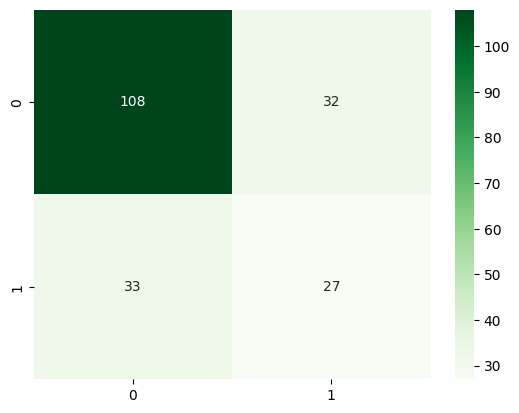

In [36]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

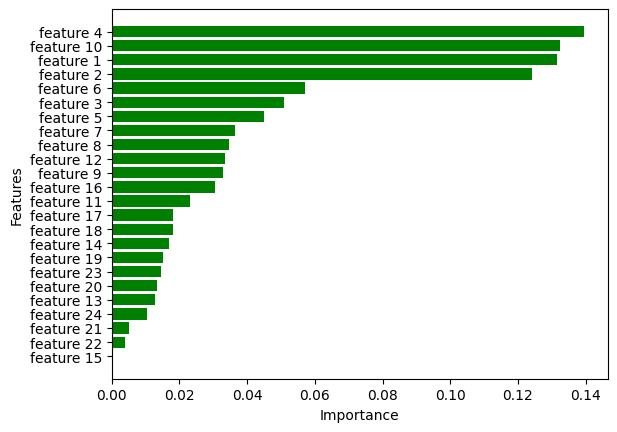

In [37]:
# getting important features (Data Mining)
idx = np.argsort(tree.feature_importances_)

plt.barh(np.arange(len(idx)), tree.feature_importances_[idx], color='Green')
plt.yticks(np.arange(len(idx)), [df.columns[i] for i in idx])
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

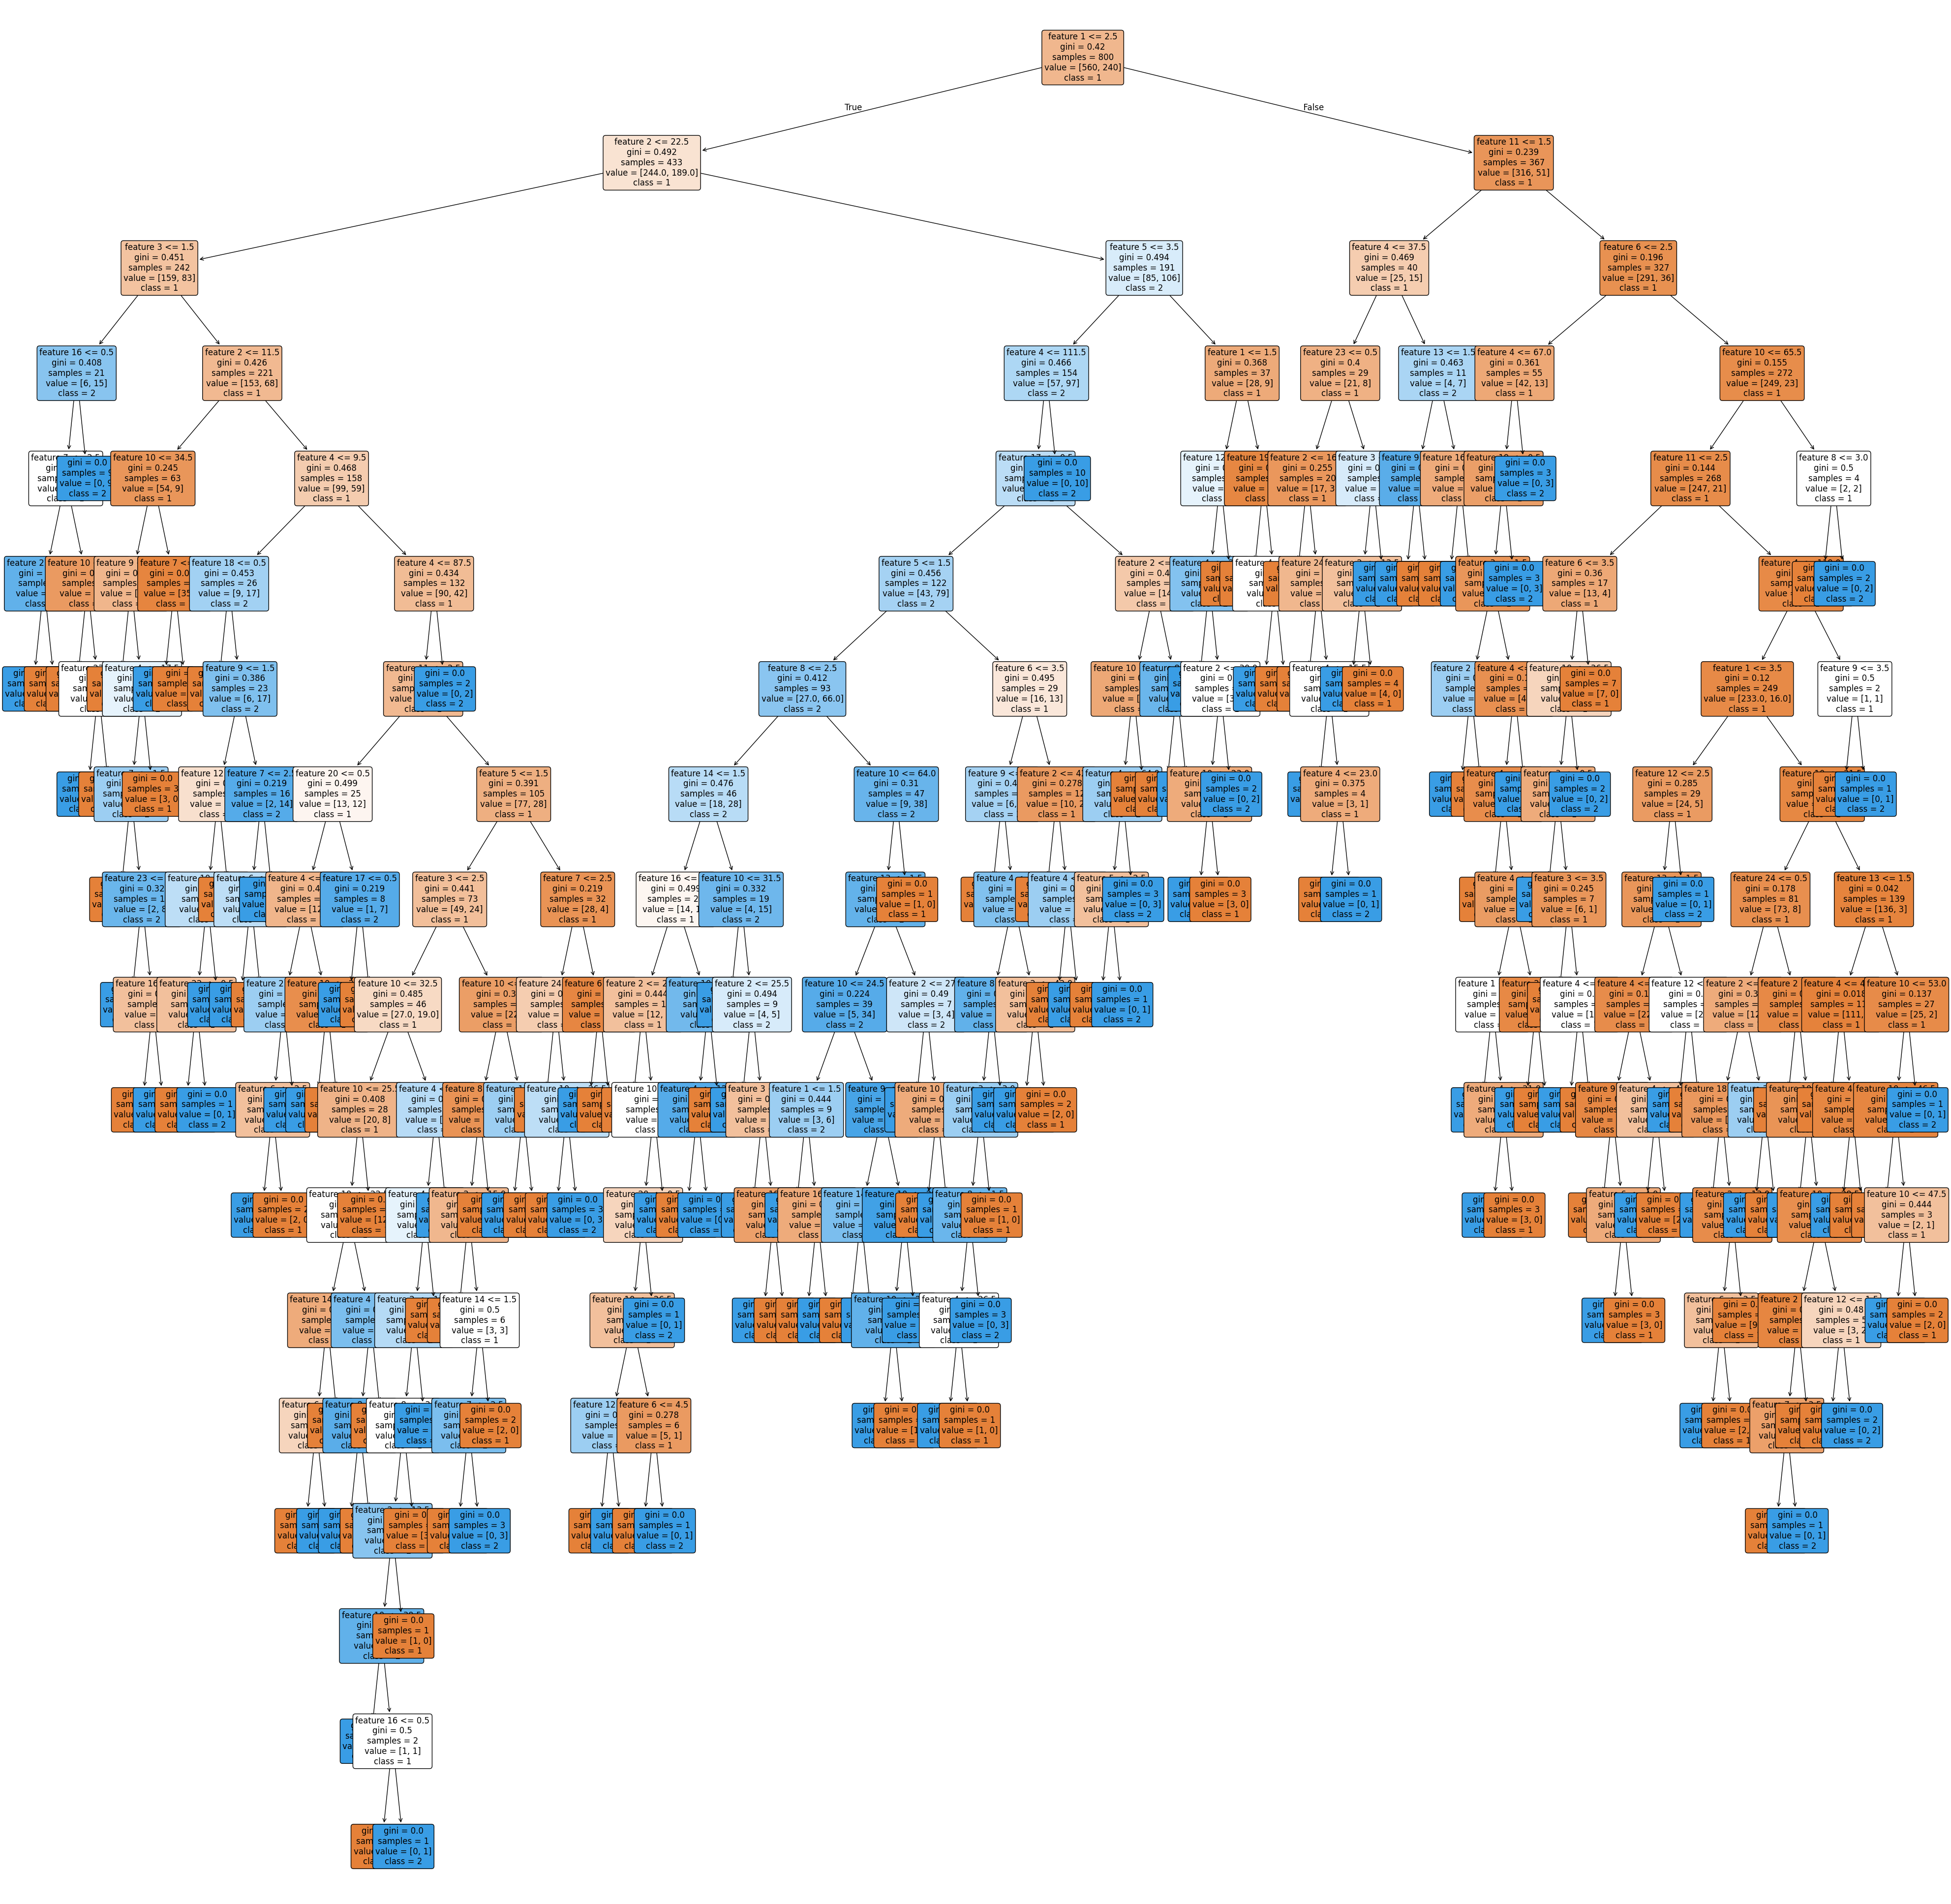

In [38]:
plt.figure(figsize=(50, 50))
plot_tree(
    tree,
    feature_names=df.drop('target', axis=1).columns,
    class_names=['1', '2'],
    filled=True,
    rounded=True,
    fontsize=12
    )
plt.show()

### modified tree

In [39]:
tree = DecisionTreeClassifier(
    min_samples_leaf=14,
    min_samples_split=6,
    min_impurity_decrease=0.001,
    max_depth=7
)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.86      0.86       140
           2       0.67      0.63      0.65        60

    accuracy                           0.80       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.79      0.80      0.79       200



<Axes: >

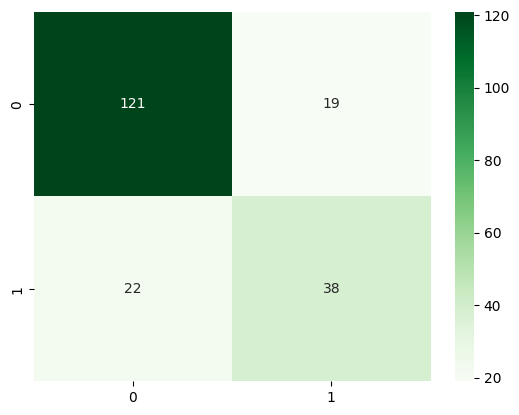

In [40]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

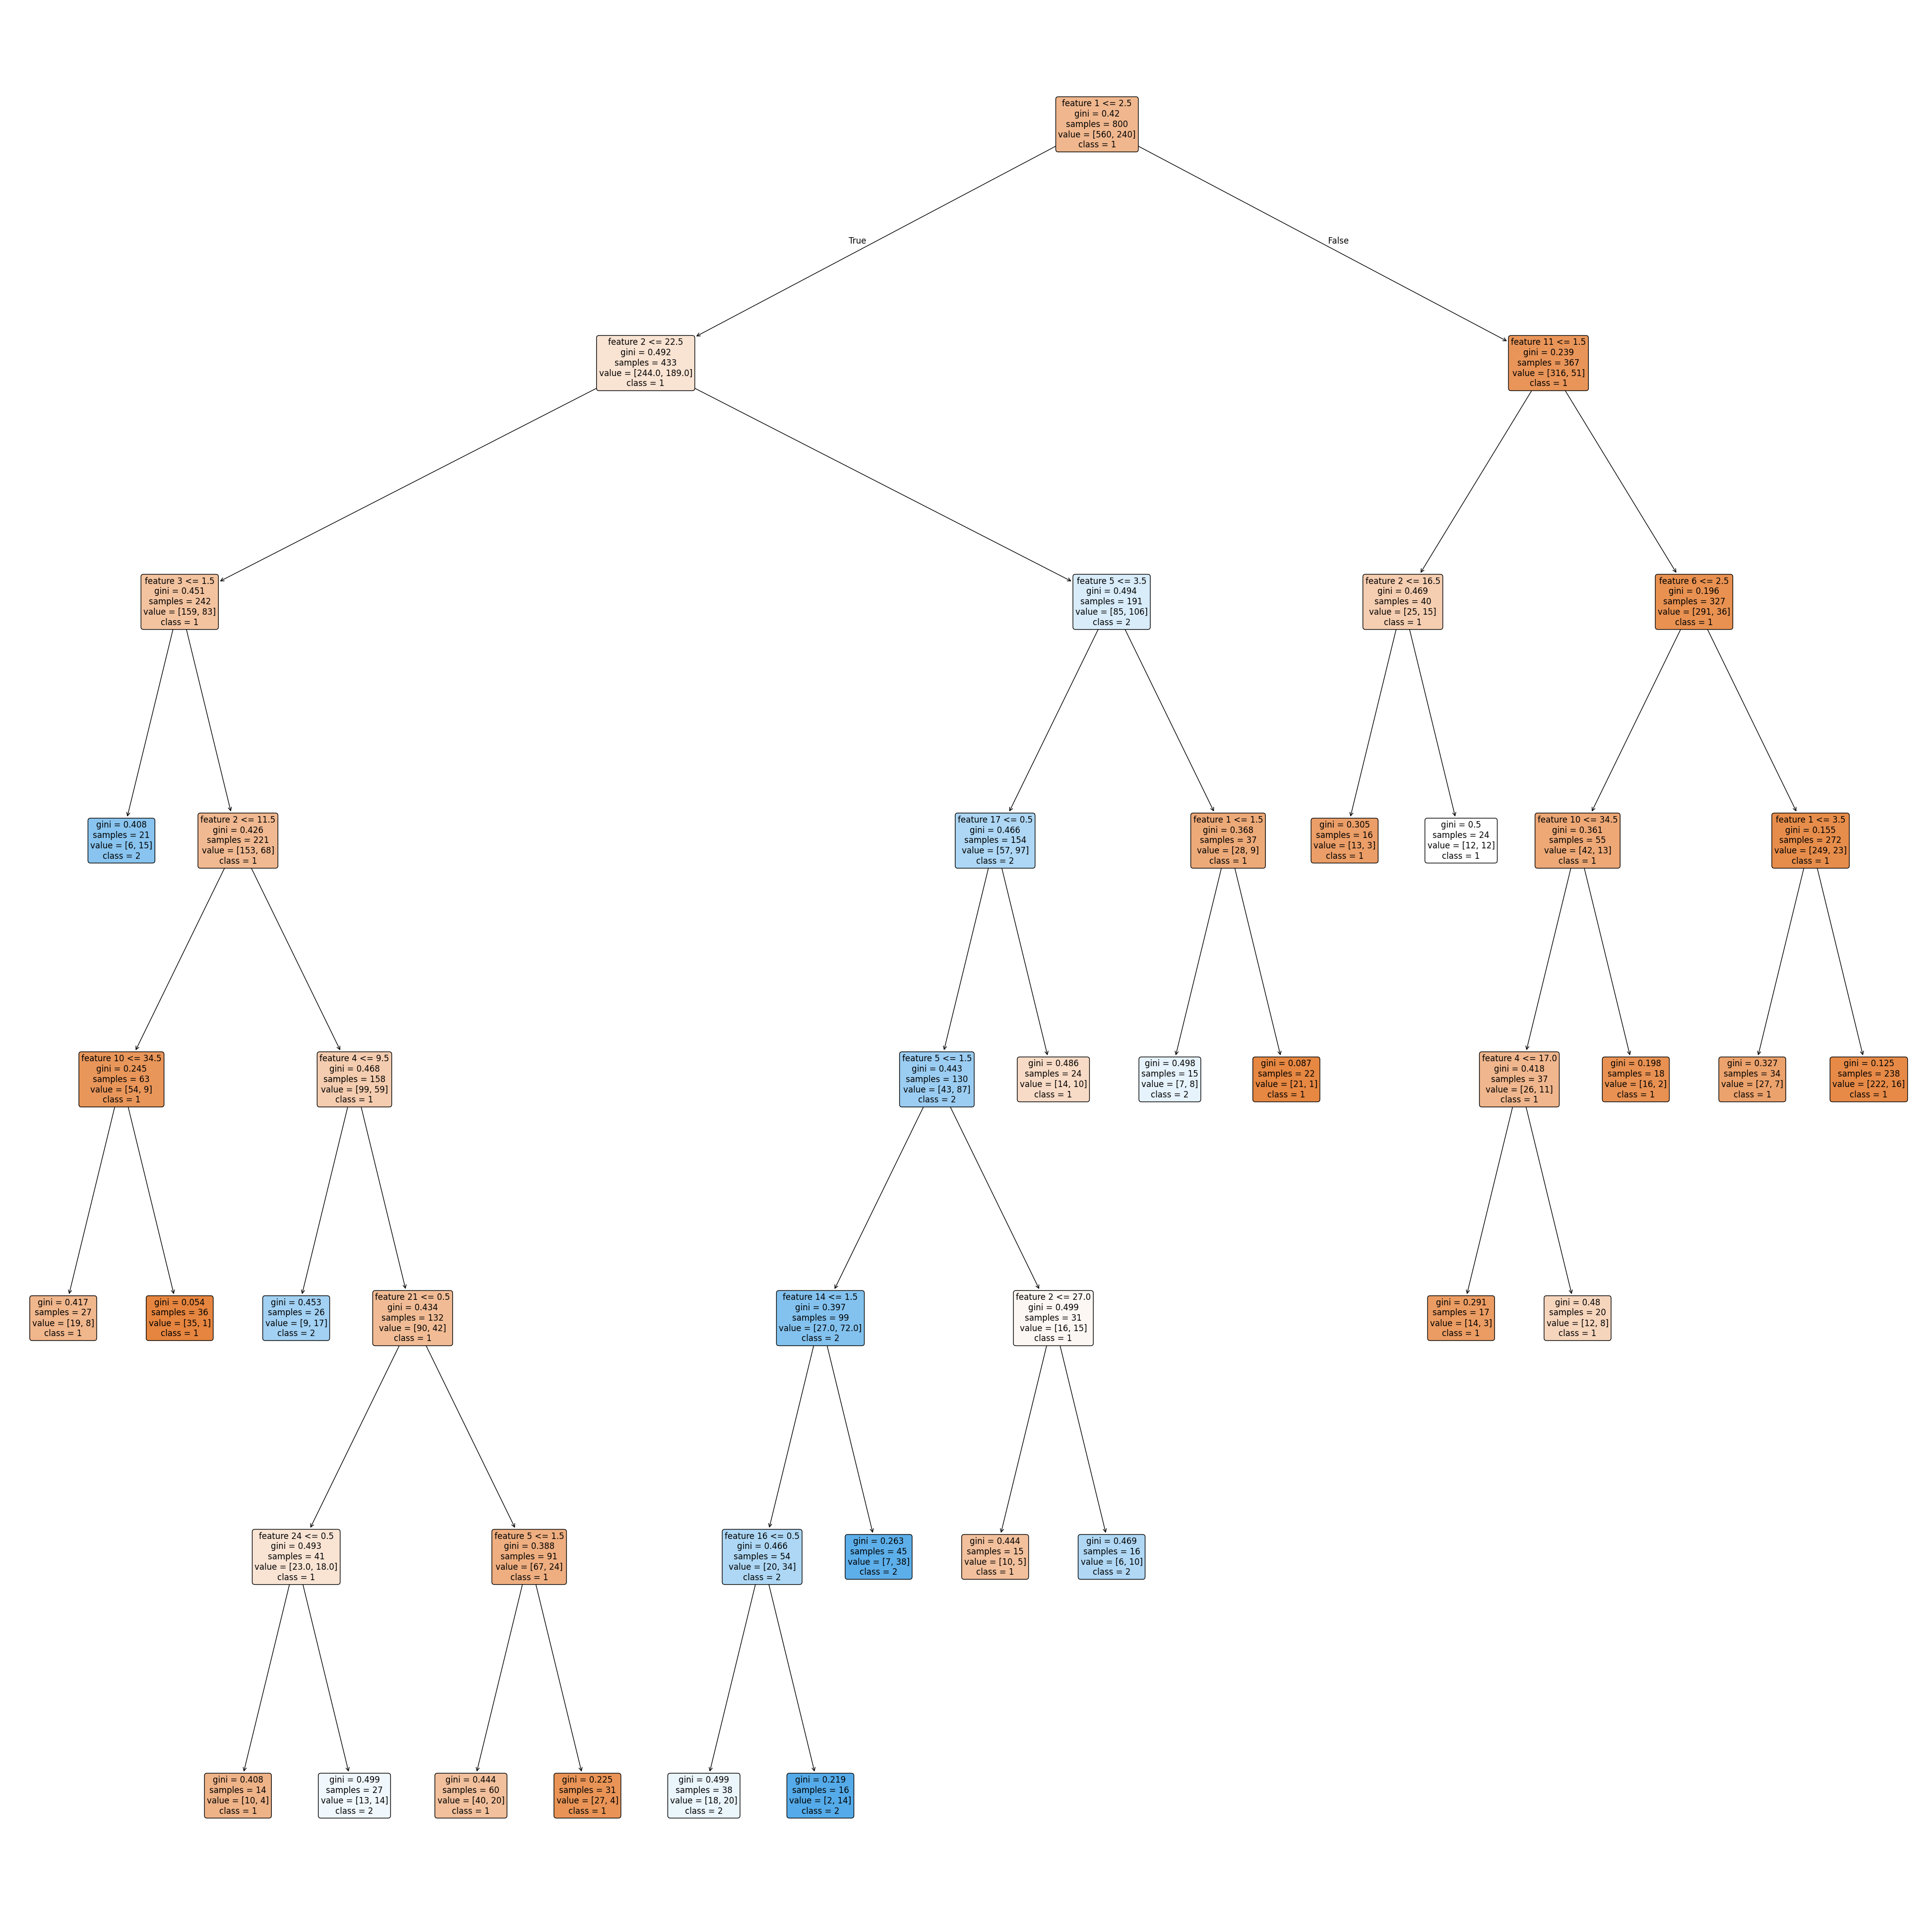

In [41]:
plt.figure(figsize=(50, 50))
plot_tree(
    tree,
    feature_names=df.drop('target', axis=1).columns,
    class_names=['1', '2'],
    filled=True,
    rounded=True,
    fontsize=12
    )
plt.show()

### tree with only important features

Let's see if we can generate almost same results using only the important features.

In [42]:
important_features = ['feature 4', 'feature 1', 'feature 2', 'feature 10'] # based on data mining part

# rebuilding the tree with the manually pruning approach using only important features
model = DecisionTreeClassifier(
    min_samples_leaf=14,
    min_samples_split=6,
    min_impurity_decrease=0.001,
    max_depth=7
)
model.fit(X_train[important_features], y_train)

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       min_samples_leaf=14, min_samples_split=6)

In [43]:
y_pred = model.predict(X_test[important_features])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.83      0.80       140
           2       0.52      0.43      0.47        60

    accuracy                           0.71       200
   macro avg       0.65      0.63      0.64       200
weighted avg       0.70      0.71      0.70       200



The accuracy decreased significantly comparing to the modified version of the tree. Using only major features can't reach the target.

<Axes: >

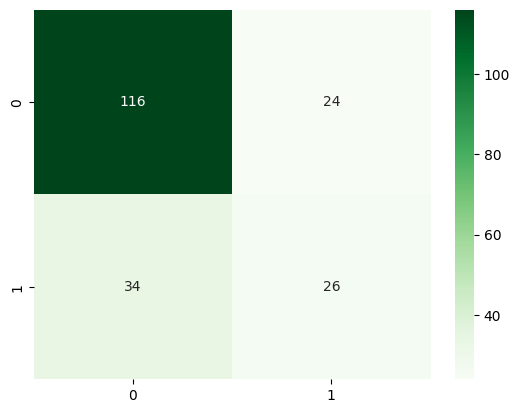

In [44]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Greens'
    )

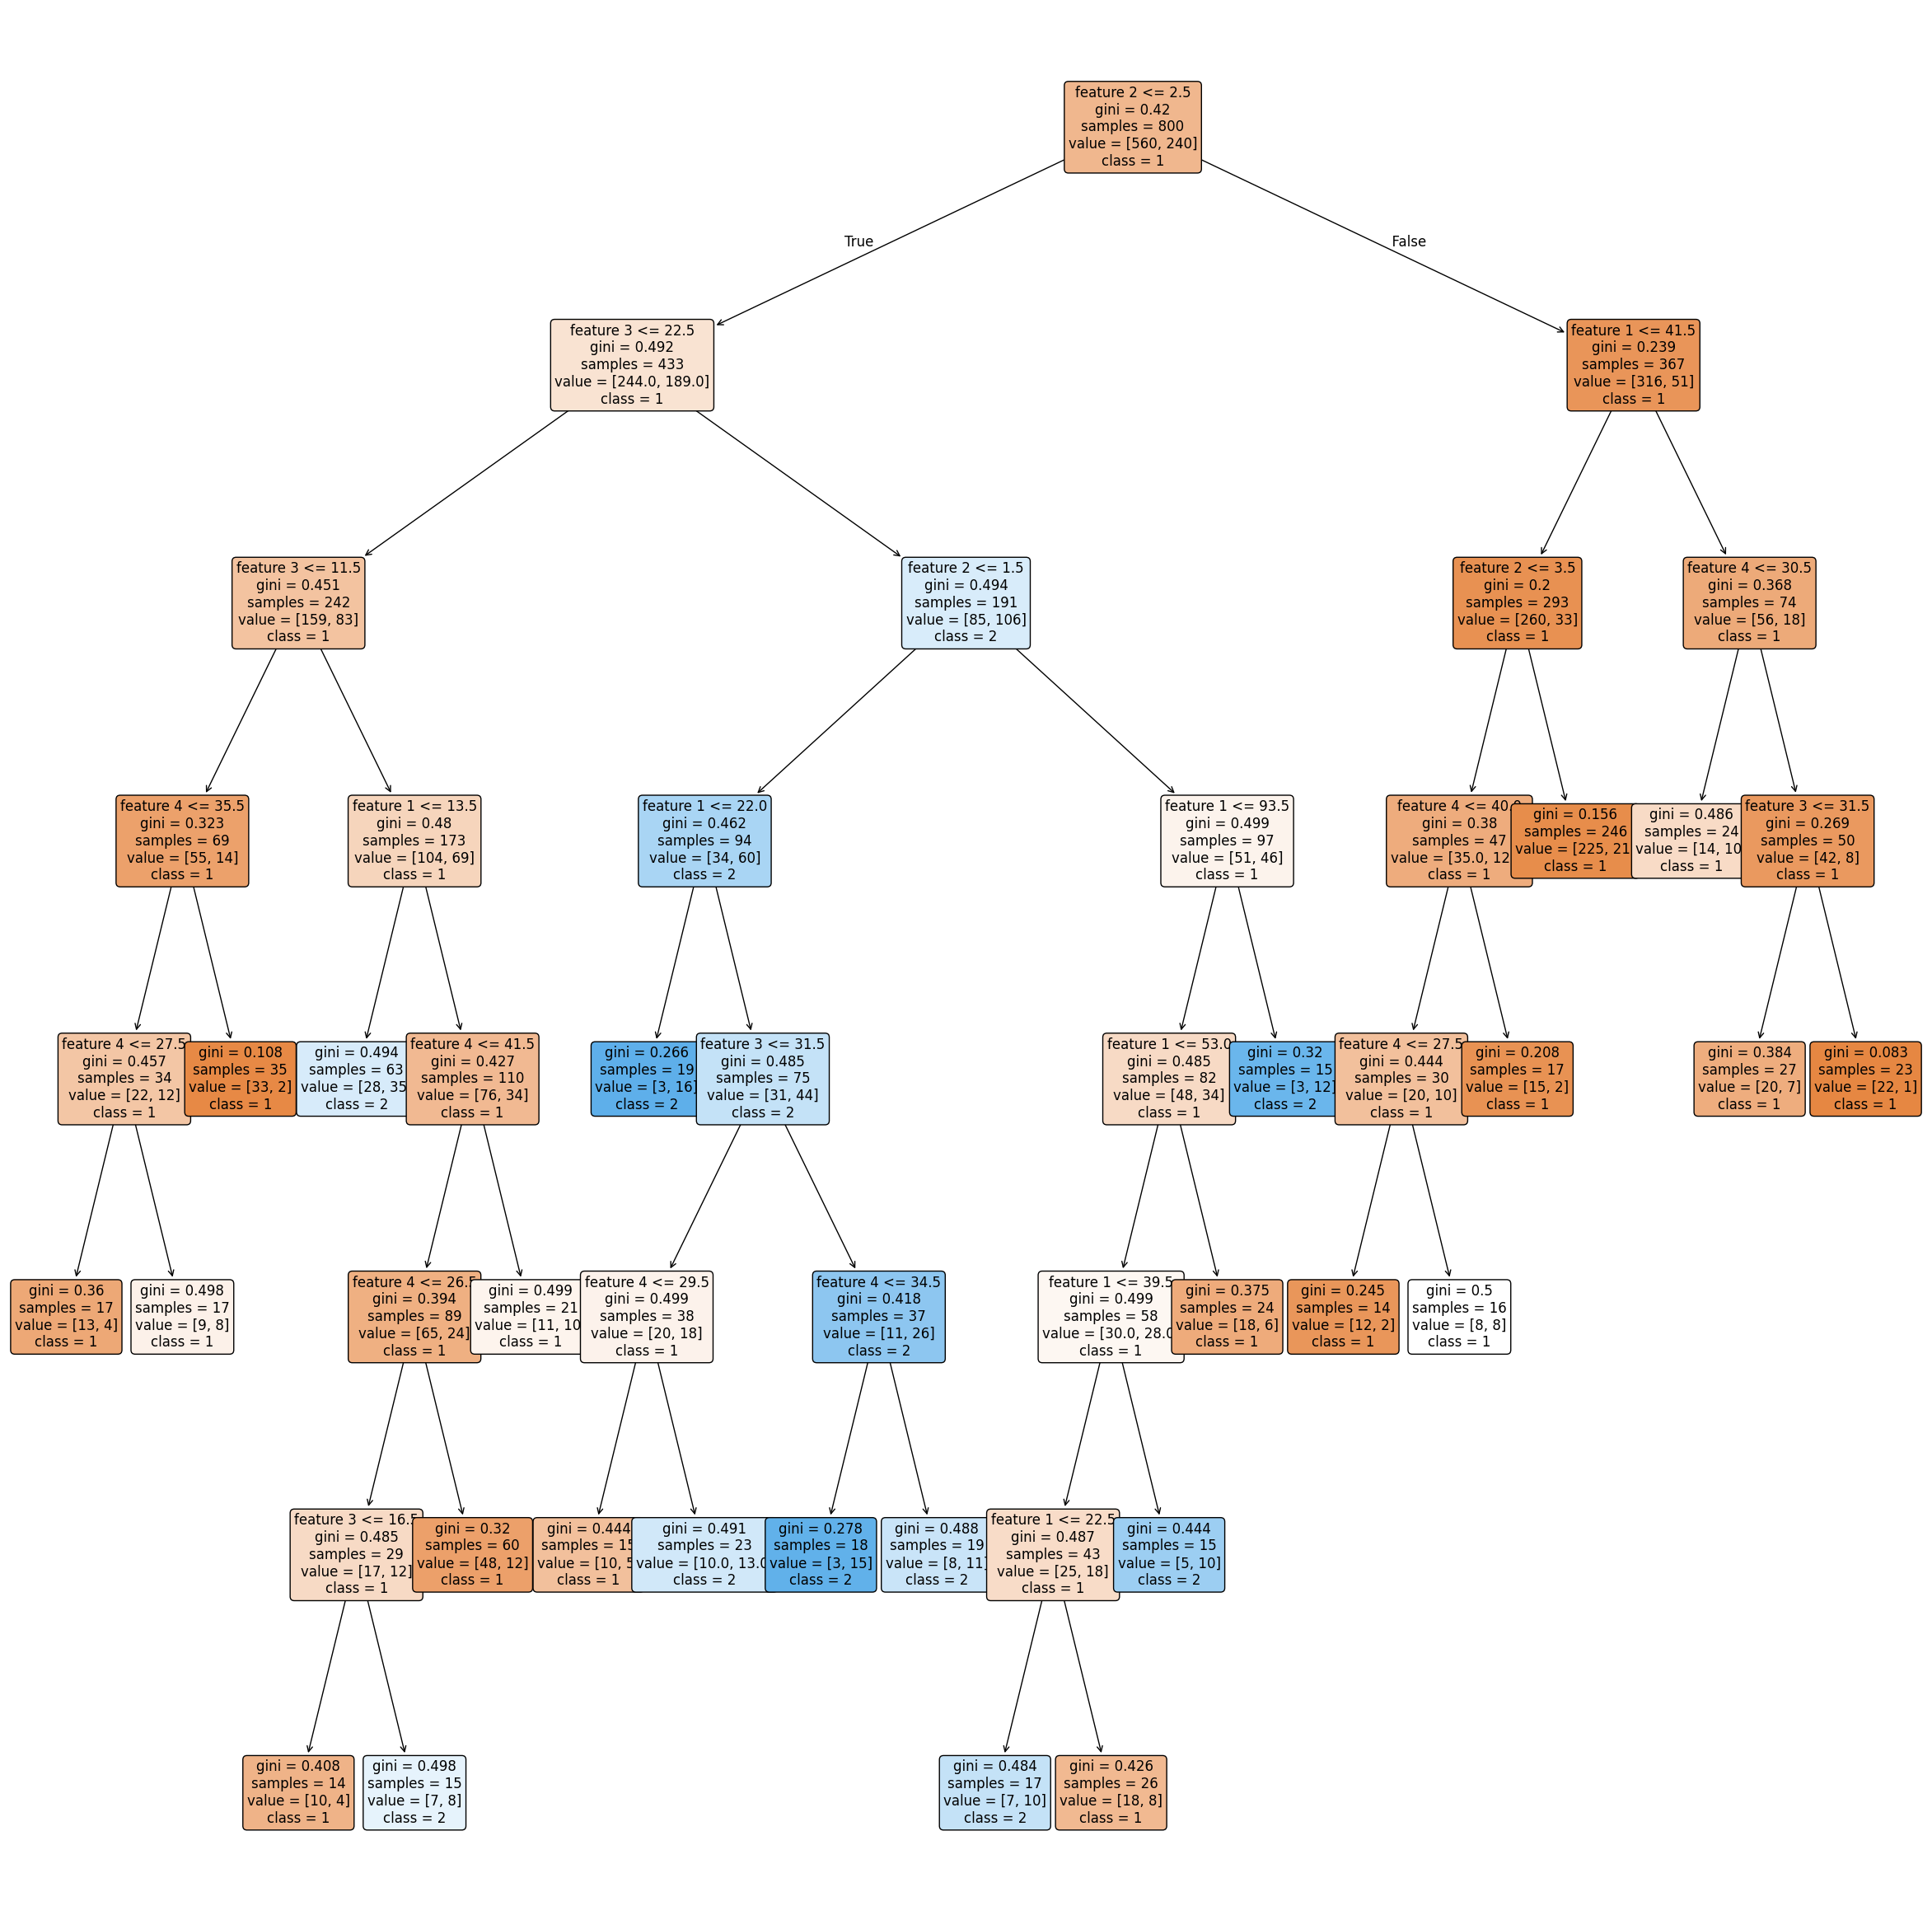

In [45]:
# final tree (visualized)
plt.figure(figsize=(30, 30))
plot_tree(model,
          feature_names=df.drop('target', axis=1).columns,
          class_names=['1', '2'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()